In [8]:
"""
================================
Nearest Neighbors Classification
================================

Sample usage of Nearest Neighbors classification.
This notebook is all about finding the best tuning with the KNN model,
for predicting activities types in function of acceleration measurements.

It will plot the decision boundaries for each class.
"""
print(__doc__)


Nearest Neighbors Classification

Sample usage of Nearest Neighbors classification.
This notebook is all about finding the best tuning with the KNN model,
for predicting activities types in function of acceleration measurements.

It will plot the decision boundaries for each class.



In [9]:
# Import statements
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.mplot3d.art3d import Line3D

In [10]:
# Import raw data
data_path = '../data/cleaned_data/full_with_act_1_transitory_regimes_cleaned.csv'
data =pd.read_csv(data_path,header=None,delimiter=',').astype(int)

X = data.values[:,1:4]
Y = data.values[:,4]

In [11]:
# Check whether data is well imported
print("*** DATA HEAD ***")
print(data.head())
print("*** DATA DIMENSIONS ***")
print(data.shape)
print("*** X DIMENSIONS ***")
print(X.shape)
print("*** X ***")
print(X[0:5,0:4])
print("*** Y DIMENSIONS ***")
print(Y.shape)
print("*** Y ***")
print(Y[1:5])
print(Y[-5:-1])

*** DATA HEAD ***
     0     1     2     3  4
0  400  1940  2368  2151  1
1  401  1936  2371  2153  1
2  402  1939  2379  2154  1
3  403  1943  2379  2154  1
4  404  1942  2363  2157  1
*** DATA DIMENSIONS ***
(160424, 5)
*** X DIMENSIONS ***
(160424, 3)
*** X ***
[[1940 2368 2151]
 [1936 2371 2153]
 [1939 2379 2154]
 [1943 2379 2154]
 [1942 2363 2157]]
*** Y DIMENSIONS ***
(160424,)
*** Y ***
[1 1 1 1]
[7 7 7 7]


In [12]:
# We are in a classification problem
n_neighbors = 10
clf = neighbors.KNeighborsClassifier(n_neighbors) # We specify to use K Neighbors Classifier method
clf.fit(X, Y) # Launching the model teaching

KNeighborsClassifier(n_neighbors=10)

In [13]:
# If we were in regresssion
# clf = neighbors.KNeighborsRegressor(n_neighbors=) # je précise la méthode et ses hyperparamètres


In [14]:
# prevision
clf.predict(X)

array([7, 7, 7, ..., 7, 7, 7])

In [15]:
clf.score(X,Y) # predit + calcul le score = la précision

0.8698137435795142

In [16]:
import random
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=random.seed())
print(X_train.shape)
print(X_test.shape)


(112296, 3)
(48128, 3)


In [17]:
n_neighbors=9
clf = neighbors.KNeighborsClassifier(n_neighbors) # je précise la méthode et ses hyperparamètres
clf.fit(X_train, Y_train) # je lance l'apprentissage
prev_test = clf.predict(X_test)
sc_train = clf.score(X_train,Y_train)
sc_test = clf.score(X_test,Y_test)
print(sc_train)
print(sc_test)

0.8718387119754933
0.8528922872340425


In [18]:
# Compute the confusion matrix between kmean label and iris types
from sklearn.metrics import confusion_matrix

cmat=confusion_matrix(Y_test,prev_test)
# the confusion matrix is difficult to read as labels assigned by kmeans are arbitrary
print(cmat)

[[ 9376     0     1    32     1     0    55]
 [    6    22     6   123     7     0   102]
 [    4     8  1072   237    20     9  1969]
 [  137    18   112  6761   149    23   914]
 [    8     0     5   487   318     5   135]
 [   10     0    65   591    27    24   192]
 [  142    35   700   687    40    18 23475]]


In [19]:
# To see the effects of sharing ...

from sklearn.model_selection import KFold
kf=KFold(n_splits=4, shuffle=True) # validation sharing
XXX = X_train[:12,:]  # Only take first 12 rows
for learn,test in kf.split(XXX): # loop on different validation shares
  print("Learn")
  print(learn)
  print("test")
  print(test)

Learn
[ 0  1  2  3  5  6  7  8 10]
test
[ 4  9 11]
Learn
[ 0  1  2  3  4  8  9 10 11]
test
[5 6 7]
Learn
[ 0  3  4  5  6  7  8  9 11]
test
[ 1  2 10]
Learn
[ 1  2  4  5  6  7  9 10 11]
test
[0 3 8]


In [20]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, shuffle=True) # validation shares


from sklearn import neighbors
scores=[]
for k in range(1,10):  # Different values of K to test
    score=0
    clf=neighbors.KNeighborsClassifier(k)
    for learn,test in kf.split(X_train): # Loop on differents validation sharings
        X_app=X_train[learn]
        Y_app=Y_train[learn]
        clf.fit(X_app,Y_app)
        X_val=X_train[test]
        Y_val=Y_train[test]
        score+=clf.score(X_val,Y_val)
    scores.append(score)
print(scores)
#plt(scores)
k_opt=scores.index(max(scores)) + 1  # Optimal value of K
print(k_opt)

[2.3889452874545842, 2.349674075657192, 2.497969651634965, 2.5082549690104723, 2.5424770250053426, 2.5390842060269287, 2.5596014105578115, 2.5597082709980765, 2.566921350715965]
9


In [21]:
h = 100  # step size in the mesh for the graphics

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

from utils.colorpalette import black, red, blue, green, yellow, pink, brown, violet
from utils.activities import activities_labels

cmap_perso = np.array([black, red, blue, green, yellow, pink, brown, violet])

# create class legend
legend = []
for activity, color in zip(activities_labels, cmap_perso):
    legend.append(Line3D([0], [0], [0],marker='o', label=activity,ls='None', markerfacecolor=color, markeredgecolor='k'))

/tmp/ipykernel_8285/2564270255.py:18: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/tmp/ipykernel_8285/2564270255.py:18: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


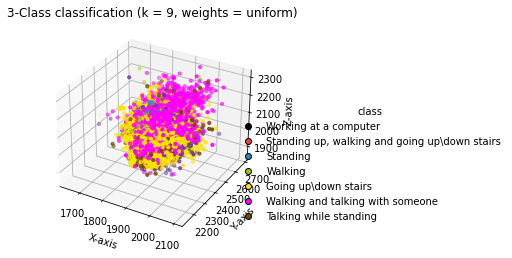

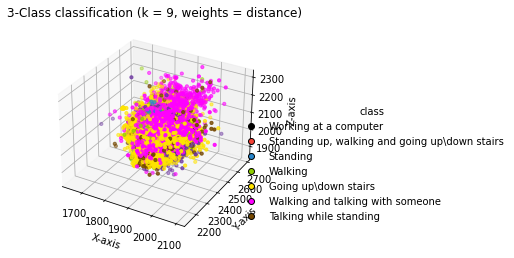

In [22]:
# try two different values for the weights argument in knn
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h),np.arange(z_min, z_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    # ax.pcolormesh(xx, Z, cmap=cmap_light)
    

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=10, c=cmap_perso[Y.astype(int)])
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_zlim(zz.min(), zz.max())
    ax.set_title("3-Class classification (k = %i, weights = %s)" % (n_neighbors, weights))
    
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    
    ax.legend(handles=legend, loc='center', 
                    bbox_to_anchor=(1.5, 0.35),
                    frameon=False, title='class')

plt.show()